In [97]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [98]:
doc = pd.read_excel("C:/Users/STAFF/Desktop/Git_Repos/Telco_customer_churn.xlsx")
doc.sample(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
531,9430-FRQOC,1,United States,California,San Diego,92106,"32.71346, -117.236378",32.713460,-117.236378,Female,...,Month-to-month,Yes,Mailed check,87.10,341.45,Yes,1,80,5587,Competitor offered higher download speeds
1985,9073-ZZIAY,1,United States,California,Long Beach,90806,"33.802664, -118.179971",33.802664,-118.179971,Male,...,Two year,No,Electronic check,86.10,5215.25,No,0,62,5769,NaN
278,0634-SZPQA,1,United States,California,San Anselmo,94960,"37.99272, -122.575026",37.992720,-122.575026,Female,...,Month-to-month,Yes,Bank transfer (automatic),90.05,2169.8,Yes,1,67,4650,Competitor offered higher download speeds
969,1150-WFARN,1,United States,California,Brawley,92227,"33.03933, -115.191857",33.039330,-115.191857,Female,...,Two year,Yes,Credit card (automatic),108.75,7156.2,Yes,1,90,5516,Competitor had better devices
2794,2226-ICFDO,1,United States,California,Covelo,95428,"39.83307, -123.178765",39.833070,-123.178765,Female,...,Two year,Yes,Credit card (automatic),85.90,6110.75,No,0,72,6361,NaN


In [99]:
doc.drop(columns =["CustomerID","Count","Churn Reason","Churn Label","Churn Score","Lat Long"], inplace = True)

In [100]:
doc.shape

(7043, 27)

In [101]:
doc = doc.dropna()
doc.shape

(7043, 27)

In [102]:
doc = doc[doc["Total Charges"] != " "]
doc.shape

(7032, 27)

In [103]:
doc["Total Charges"] = pd.to_numeric(doc["Total Charges"])


In [104]:
doc.dtypes

Country               object
State                 object
City                  object
Zip Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Value            int64
CLTV                   int64
dtype: object

In [105]:
def values_in_each_col(dataframe):
    for i in dataframe:
        if dataframe[i].dtypes == "object":
            print(f"{i} : {dataframe[i].unique()}")

In [106]:
values_in_each_col(doc)

Country : ['United States']
State : ['California']
City : ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Tulelake'
 'Olympic Valley' 'Redcrest']
Gender : ['Male' 'Female']
Senior Citizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
Phone Service : ['Yes' 'No']
Multiple Lines : ['No' 'Yes' 'No phone service']
Internet Service : ['DSL' 'Fiber optic' 'No']
Online Security : ['Yes' 'No' 'No internet service']
Online Backup : ['Yes' 'No' 'No internet service']
Device Protection : ['No' 'Yes' 'No internet service']
Tech Support : ['No' 'Yes' 'No internet service']
Streaming TV : ['No' 'Yes' 'No internet service']
Streaming Movies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'Two year' 'One year']
Paperless Billing : ['Yes' 'No']
Payment Method : ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [107]:
doc.replace("No internet service" , "No", inplace = True)
doc.replace("No phone service" , "No", inplace = True)


In [108]:
values_in_each_col(doc)

Country : ['United States']
State : ['California']
City : ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Tulelake'
 'Olympic Valley' 'Redcrest']
Gender : ['Male' 'Female']
Senior Citizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
Phone Service : ['Yes' 'No']
Multiple Lines : ['No' 'Yes']
Internet Service : ['DSL' 'Fiber optic' 'No']
Online Security : ['Yes' 'No']
Online Backup : ['Yes' 'No']
Device Protection : ['No' 'Yes']
Tech Support : ['No' 'Yes']
Streaming TV : ['No' 'Yes']
Streaming Movies : ['No' 'Yes']
Contract : ['Month-to-month' 'Two year' 'One year']
Paperless Billing : ['Yes' 'No']
Payment Method : ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [109]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in doc.columns:
    if doc[i].dtypes == "object":
         doc[i] = encoder.fit_transform(doc[i])

doc.sample(5)

,Country,State,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
3751,0,0,760,94060,37.225650,-122.297533,0,0,1,1,...,1,1,0,1,1,0,70.75,4263.45,0,4133
4605,0,0,500,92253,33.695532,-116.310571,1,0,0,0,...,0,0,0,0,0,3,50.75,50.75,0,3631
4488,0,0,811,91701,34.132275,-117.611478,0,0,0,0,...,0,1,1,0,1,2,95.70,4729.75,0,4164
1062,0,0,553,93437,34.757477,-120.550507,0,0,1,0,...,0,0,0,0,1,2,24.45,482.80,1,3298
5184,0,0,294,95318,37.654551,-119.822984,1,0,1,1,...,0,0,0,2,1,0,24.05,1230.90,0,4039


In [110]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

# doc = minmax.fit_transform(doc.values)


# doc.iloc[:, :] = minmax.fit_transform(doc.values)

# doc = pd.DataFrame(doc) 
# doc.sample(5)

In [111]:
import pickle

pickle.dump(minmax,open('scaling.pkl','wb'))

In [112]:
import pandas as pd

doc = pd.DataFrame(doc) 

X = doc.drop(columns = "Churn Value", axis= "columns")
y= doc["Churn Value"]

In [113]:
minmax.fit(X)


MinMaxScaler()

In [114]:
X = minmax.transform(X)

In [115]:
X.shape

(7032, 26)

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size= 0.70, random_state=None)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

X_train.shape

(4922, 26)

In [117]:
import tensorflow

In [118]:
import tensorflow
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape = (26,), activation = "relu"),
    keras.layers.Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
154/154 [==============================] - 2s 3ms/step - loss: 0.5844 - accuracy: 0.6802
Epoch 2/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4592 - accuracy: 0.7733
Epoch 3/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4288 - accuracy: 0.7928
Epoch 4/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.7968
Epoch 5/100
154/154 [==============================] - 1s 3ms/step - loss: 0.4147 - accuracy: 0.8003
Epoch 6/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.8043
Epoch 7/100
154/154 [==============================] - 1s 3ms/step - loss: 0.4110 - accuracy: 0.8046
Epoch 8/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.8041
Epoch 9/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4074 - accuracy: 0.8104
Epoch 10/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4059 - accura

In [119]:
y_pred = model.predict(X_test)

33/33 [==============================] - 0s 2ms/step


In [120]:
model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 3ms/step - loss: 0.4091 - accuracy: 0.7972


[0.4091457426548004, 0.7971563935279846]

In [121]:
y_pred[:5]

array([[0.0076448 ],
       [0.09155203],
       [0.00189352],
       [0.83848774],
       [0.32469034]], dtype=float32)

In [122]:
y_pred_final = []
for i in y_pred:
    if i > 0.5:
        y_pred_final.append(1)
    else:
        y_pred_final.append(0)

In [123]:
y_pred_final[:12]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [124]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       777
           1       0.63      0.55      0.59       278

    accuracy                           0.80      1055
   macro avg       0.74      0.72      0.73      1055
weighted avg       0.79      0.80      0.79      1055



Text(70.72222222222221, 0.5, 'Real')

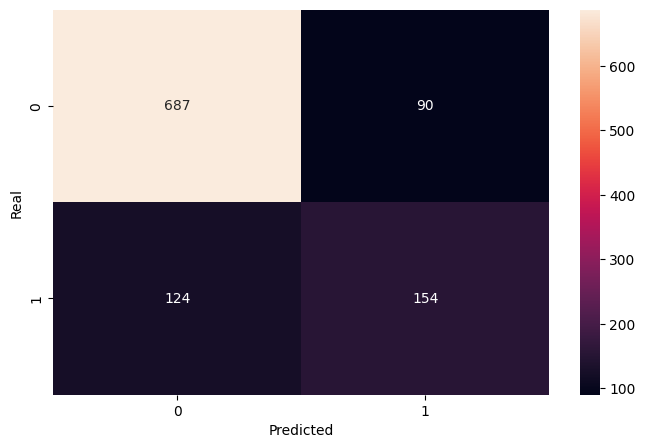

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

cM =  tensorflow.math.confusion_matrix(labels = y_test, predictions= y_pred_final)

plt.figure(figsize = (8,5))
sns.heatmap(cM, annot =True, fmt ="d")
plt.xlabel('Predicted')
plt.ylabel('Real')

In [126]:
###Pickle the file for deployment

In [127]:
import pickle

In [128]:
pickle.dump(model,open('churn_model.pkl','wb'))

In [129]:
pickled_model = pickle.load(open('churn_model.pkl','rb'))